<a href="https://colab.research.google.com/github/pankaj892/ML.now_Course_GS/blob/main/UniVariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Univariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: June 11, 2021


**Author**:
 Pankaj Biradar

**Reach out**:
[GitHub](https://github.com/pankaj892) | [LinkedIn](https://www.linkedin.com/in/pankaj-biradar/)



##Setup

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
ls

student-mat.csv  student-por.csv  univariate_MathData_2.csv
student-merge.R  student.txt


In [39]:
cd '/content/drive/MyDrive/Student Data'

/content/drive/MyDrive/Student Data


In [40]:
ls

student-mat.csv  student-por.csv  univariate_MathData_2.csv
student-merge.R  student.txt


In [41]:
import os

In [42]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [43]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [44]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [45]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [46]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [47]:
ls

student-mat.csv  student-por.csv  univariate_MathData_2.csv
student-merge.R  student.txt


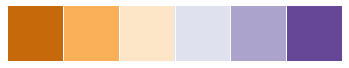

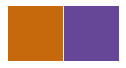

In [48]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [49]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

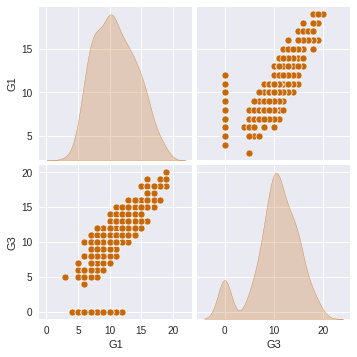

In [50]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

In [51]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [52]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [53]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [54]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [55]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [56]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [57]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [58]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 0s 14ms/step - loss: 3.9538 - mae: 3.9538 - mse: 23.3073 - val_loss: 4.1858 - val_mae: 4.1858 - val_mse: 23.0335
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 3.8483 - mae: 3.8483 - mse: 22.3769 - val_loss: 4.0668 - val_mae: 4.0668 - val_mse: 21.9752
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 3.7440 - mae: 3.7440 - mse: 21.4835 - val_loss: 3.9491 - val_mae: 3.9491 - val_mse: 20.9598
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 3.6391 - mae: 3.6391 - mse: 20.6032 - val_loss: 3.8350 - val_mae: 3.8350 - val_mse: 19.9920
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 3.5370 - mae: 3.5370 - mse: 19.7615 - val_loss: 3.7206 - val_mae: 3.7206 - val_mse: 19.0537
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 3.4373 - mae: 3.4373 - mse: 18.9535 - val_loss: 3.6067 - val_mae: 3.6067 - val_mse: 18.1514
Epoch 7/3

In [59]:
print(history)

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


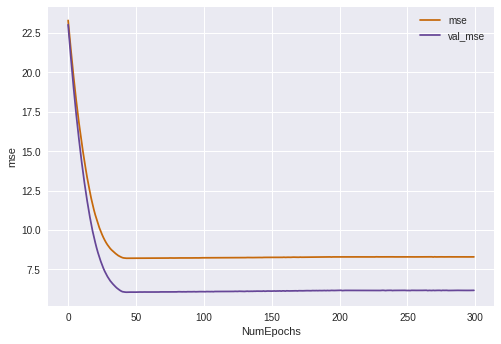

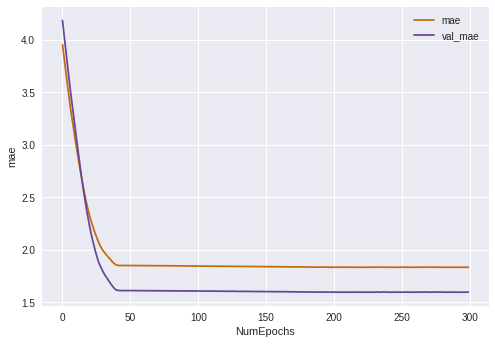

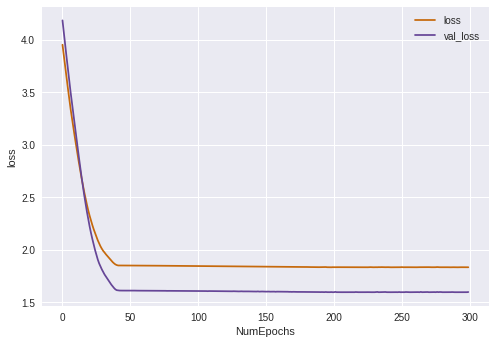

In [61]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [62]:
model.predict([1])

array([[1.0024168]], dtype=float32)

In [63]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.0024168]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.0024168]
 [2.002649 ]
 [3.002881 ]
 [4.0031133]
 [5.0033455]]

List of Predictions (flattened out):
[1.0024168 2.002649  3.002881  4.0031133 5.0033455]



In [64]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [65]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [66]:
print(len(testPreds))
print(testPreds)

79
[14.005434   6.003577  11.004738  17.00613   17.00613   12.00497
 14.005434  19.006594  19.006594   8.004042  14.005434  13.005202
  8.004042   7.0038095  9.004273  13.005202  11.004738  16.005898
  7.0038095 10.004506  15.005667  13.005202  14.005434  16.005898
  7.0038095  7.0038095  8.004042  10.004506  12.00497   10.004506
 12.00497   13.005202  10.004506   6.003577   9.004273  12.00497
  7.0038095  8.004042  14.005434   9.004273   9.004273   7.0038095
 12.00497    6.003577  13.005202   7.0038095  7.0038095 11.004738
 13.005202  17.00613   12.00497   15.005667   9.004273  12.00497
 15.005667  12.00497   15.005667  12.00497   15.005667  11.004738
 12.00497    8.004042  16.005898   7.0038095 16.005898  11.004738
 16.005898  13.005202   8.004042   8.004042  12.00497   18.006361
 13.005202  16.005898  10.004506   7.0038095 10.004506   7.0038095
 11.004738 ]


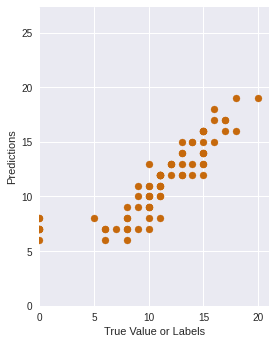

In [67]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

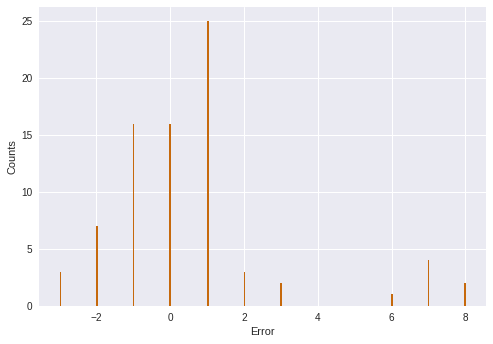

In [68]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)